# Buscas não supervisionadas

## Imports

In [197]:
# imports necessarios
from search import *
from notebook import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import time
from statistics import mean, stdev
from math import sqrt
from memory_profiler import memory_usage
import matplotlib.pyplot as plt
import random
import heapq
import math
import sys
from collections import defaultdict, deque, Counter
from itertools import combinations


# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

## Criação do mapa e do grafo

In [198]:
# make the dict where the key is associated with his neighbors
mapa = {}
for i in range(0,60):
    for j in range(0,60):
        mapa[(i,j)] = {(i+1,j):1, (i-1,j):1, (i,j+1):1, (i,j-1):1,}
                       #(i+1,j+1):sqrt(2), (i-1,j-1):sqrt(2), (i-1,j+1):sqrt(2), (i+1,j-1):sqrt(2),}
        
grafo = UndirectedGraph(mapa)

## Modelagem da classe problema

In [199]:
class RobotProblem(Problem):

    """Problema para encontrar o goal saindo de uma posicao (x,y) com um robo."""

    def __init__(self, initial, goal, mapa, graph):
        Problem.__init__(self, initial, goal)
        self.mapa = mapa
        self.graph = graph

    def actions(self, actual_pos):
        """The actions at a graph node are just its neighbors."""
        neighbors = list(self.graph.get(actual_pos).keys())
        valid_actions = []
        for act in neighbors:
            if act[0] == 0 or act[0] == 60 or act[1] == 0 or act[1] == 60:
                i = 1
            elif (act[0] == 20 and (0<= act[1] <= 40)):
                i = 2
            elif (act[0] == 40 and (20<= act[1] <= 60)):
                i = 3
            else:
                valid_actions.append(act)
                
        return valid_actions

    def result(self, state, action):
        """The result of going to a neighbor is just that neighbor."""
        return action

    def path_cost(self, cost_so_far, state1, action, state2):
        return cost_so_far + 1

    def goal_test(self, state):
        if state[0] == self.goal[0] and state[1] == self.goal[1]:
            return True
        else:
            return False
    def find_min_edge(self):
        """Find minimum value of edges."""
        m = infinity
        for d in self.graph.graph_dict.values():
            local_min = min(d.values())
            m = min(m, local_min)
            
    def h(self, node):
        """h function is straight-line distance from a node's state to goal."""
        locs = getattr(self.graph, 'locations', None)
        if locs:
            if type(node) is str:
                return int(distance(locs[node], locs[self.goal]))

            return int(distance(locs[node.state], locs[self.goal]))
        else:
            return infinity

## Busca nao supervisionada: DFS - Teste 1

### Calculo do custo da busca e o caminho percorrido

In [14]:
init_pos = (10,10)
goal_pos = (50,50)

robot_problem = RobotProblem(init_pos, goal_pos, mapa, grafo)
node = depth_first_graph_search(robot_problem)
print(node)

None


In [17]:
list_nodes = []
try:
    for n in node.path():
        list_nodes.append(n.state)
except:
    pass

In [18]:
x = []
y = []
for nod in list_nodes:
    x.append(nod[0])
    y.append(nod[1])

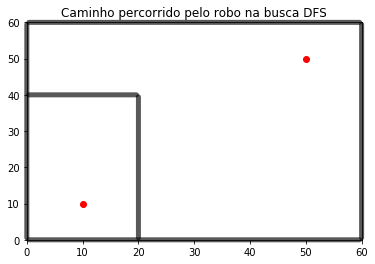

In [19]:
fig = plt.figure()
plt.xlim(0,60)
plt.ylim(0,60)
plt.title('Caminho percorrido pelo robo na busca DFS')
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(0, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(60, 0), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(60,0), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(0,60), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,0), xycoords='data',
              xytext=(20, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,40), xycoords='data',
              xytext=(0, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.scatter(x,y)
plt.scatter(10,10,color='r')
plt.scatter(50,50,color='r')
plt.show()

## Busca nao supervisionada: BFS - Teste 1

### Calculo do custo da busca e o caminho percorrido

In [29]:
init_pos = (10,10)
goal_pos = (50,50)

robot_problem = RobotProblem(init_pos, goal_pos, mapa, grafo)
node = breadth_first_graph_search(robot_problem)
print(node.path_cost)

None


In [17]:
list_nodes = []
try:
    for n in node.path():
        list_nodes.append(n.state)
except:
    pass

In [18]:
x = []
y = []
for nod in list_nodes:
    x.append(nod[0])
    y.append(nod[1])

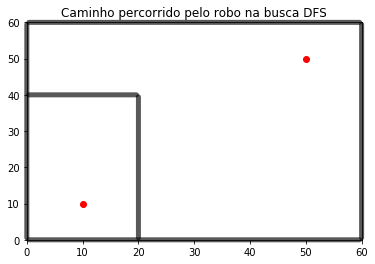

In [19]:
fig = plt.figure()
plt.xlim(0,60)
plt.ylim(0,60)
plt.title('Caminho percorrido pelo robo na busca DFS')
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(0, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(60, 0), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(60,0), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(0,60), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,0), xycoords='data',
              xytext=(20, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,40), xycoords='data',
              xytext=(0, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.scatter(x,y)
plt.scatter(10,10,color='r')
plt.scatter(50,50,color='r')
plt.show()

## Busca nao supervisionada: BFS - Teste 2

### Calculo do custo da busca e o caminho percorrido

In [24]:
init_pos = (10,10)
goal_pos = (50,50)

robot_problem = RobotProblem(init_pos, goal_pos, mapa, grafo)
node = breadth_first_graph_search(robot_problem)
print(node)

<Node (50, 50)>


In [25]:
list_nodes = []
try:
    for n in node.path():
        list_nodes.append(n.state)
except:
    pass
x = []
y = []
for nod in list_nodes:
    x.append(nod[0])
    y.append(nod[1])

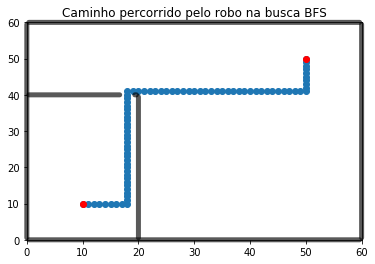

In [28]:
fig = plt.figure()
plt.xlim(0,60)
plt.ylim(0,60)
plt.title('Caminho percorrido pelo robo na busca BFS')
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(0, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(60, 0), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(60,0), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(0,60), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,0), xycoords='data',
              xytext=(20, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,40), xycoords='data',
              xytext=(19, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(17,40), xycoords='data',
              xytext=(0, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )


plt.scatter(x,y)
plt.scatter(10,10,color='r')
plt.scatter(50,50,color='r')
plt.show()

## Busca nao supervisionada: DFS - Teste 2

### Calculo do custo da busca e o caminho percorrido

In [41]:
init_pos = (10,10)
goal_pos = (50,50)

robot_problem = RobotProblem(init_pos, goal_pos, mapa, grafo)
node = depth_first_graph_search(robot_problem)
print(node.path_cost)

566


In [42]:
list_nodes = []
try:
    for n in node.path():
        list_nodes.append(n.state)
except:
    pass

In [43]:
x = []
y = []
for nod in list_nodes:
    x.append(nod[0])
    y.append(nod[1])

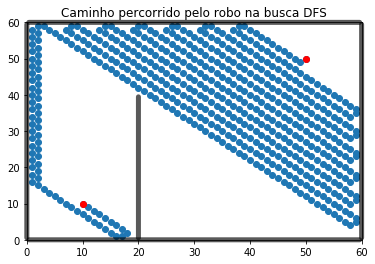

In [45]:
fig = plt.figure()
plt.xlim(0,60)
plt.ylim(0,60)
plt.title('Caminho percorrido pelo robo na busca DFS')
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(0, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(60, 0), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(60,0), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(0,60), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,0), xycoords='data',
              xytext=(20, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )


plt.scatter(x,y)
plt.scatter(10,10,color='r')
plt.scatter(50,50,color='r')
plt.show()

## Busca nao supervisionada: DFS - Teste 3

### Calculo do custo da busca e o caminho percorrido

In [47]:
init_pos = (10,10)
goal_pos = (50,50)

robot_problem = RobotProblem(init_pos, goal_pos, mapa, grafo)
node = depth_first_graph_search(robot_problem)
print(node.path_cost)

194


In [48]:
list_nodes = []
try:
    for n in node.path():
        list_nodes.append(n.state)
except:
    pass

In [49]:
x = []
y = []
for nod in list_nodes:
    x.append(nod[0])
    y.append(nod[1])

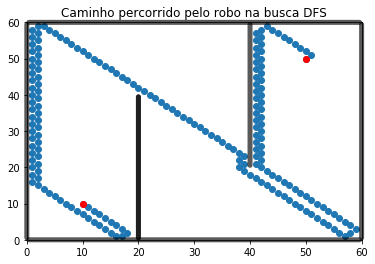

In [51]:
fig = plt.figure()
plt.xlim(0,60)
plt.ylim(0,60)
plt.title('Caminho percorrido pelo robo na busca DFS')
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(0, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(60, 0), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(60,0), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(0,60), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,0), xycoords='data',
              xytext=(20, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(40,20), xycoords='data',
              xytext=(40, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,0), xycoords='data',
              xytext=(20, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.scatter(x,y)
plt.scatter(10,10,color='r')
plt.scatter(50,50,color='r')
plt.show()

## Busca nao supervisionada: BFS - Teste 3

### Calculo do custo da busca e o caminho percorrido

In [64]:
init_pos = (10,10)
goal_pos = (50,50)

robot_problem = RobotProblem(init_pos, goal_pos, mapa, grafo)
node = breadth_first_graph_search(robot_problem)
print(node.path_cost)

84


In [65]:
list_nodes = []
try:
    for n in node.path():
        list_nodes.append(n.state)
except:
    pass

In [66]:
x = []
y = []
for nod in list_nodes:
    x.append(nod[0])
    y.append(nod[1])

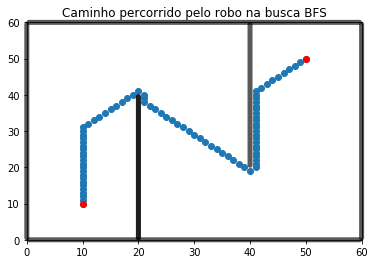

In [67]:
fig = plt.figure()
plt.xlim(0,60)
plt.ylim(0,60)
plt.title('Caminho percorrido pelo robo na busca BFS')
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(0, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(60, 0), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(60,0), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(0,60), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,0), xycoords='data',
              xytext=(20, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(40,20), xycoords='data',
              xytext=(40, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,0), xycoords='data',
              xytext=(20, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.scatter(x,y)
plt.scatter(10,10,color='r')
plt.scatter(50,50,color='r')
plt.show()

## Busca nao supervisionada: Uniform Cost Search

### Calculo do custo da busca e o caminho percorrido

In [10]:
init_pos = (10,10)
goal_pos = (50,50)

robot_problem = RobotProblem(init_pos, goal_pos, mapa, grafo)
node = uniform_cost_search(robot_problem)
print(node.path_cost)

84


In [11]:
list_nodes = []
try:
    for n in node.path():
        list_nodes.append(n.state)
except:
    pass

In [12]:
x = []
y = []
for nod in list_nodes:
    x.append(nod[0])
    y.append(nod[1])

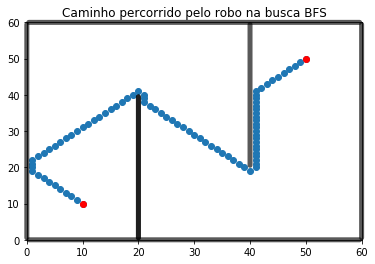

In [13]:
fig = plt.figure()
plt.xlim(0,60)
plt.ylim(0,60)
plt.title('Caminho percorrido pelo robo na busca BFS')
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(0, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(60, 0), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(60,0), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(0,60), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,0), xycoords='data',
              xytext=(20, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(40,20), xycoords='data',
              xytext=(40, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,0), xycoords='data',
              xytext=(20, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.scatter(x,y)
plt.scatter(10,10,color='r')
plt.scatter(50,50,color='r')
plt.show()

## Busca nao supervisionada: Best First Search

### Calculo do custo da busca e o caminho percorrido

In [24]:
init_pos = (10,10)
goal_pos = (50,50)

robot_problem = RobotProblem(init_pos, goal_pos, mapa, grafo)
node = best_first_graph_search(robot_problem, robot_problem.h)
print(node.path_cost)

136


In [25]:
list_nodes = []
try:
    for n in node.path():
        list_nodes.append(n.state)
except:
    pass

In [26]:
x = []
y = []
for nod in list_nodes:
    x.append(nod[0])
    y.append(nod[1])

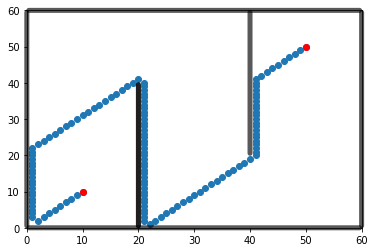

In [30]:
fig = plt.figure()
plt.xlim(0,60)
plt.ylim(0,60)
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(0, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(60, 0), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(60,0), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(0,60), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,0), xycoords='data',
              xytext=(20, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(40,20), xycoords='data',
              xytext=(40, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,0), xycoords='data',
              xytext=(20, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.scatter(x,y)
plt.scatter(10,10,color='r')
plt.scatter(50,50,color='r')
plt.show()

# Marcando todos os nós visitados pelos algoritmos

In [179]:
# class Node:
#     "A Node in a search tree."
#     def __init__(self, state, parent=None, action=None, path_cost=0):
#         self.__dict__.update(state=state, parent=parent, action=action, path_cost=path_cost)

#     def __repr__(self): return '<{}>'.format(self.state)
#     def __len__(self): return 0 if self.parent is None else (1 + len(self.parent))
#     def __lt__(self, other): return self.path_cost < other.path_cost

In [180]:
FIFOQueue = deque

LIFOQueue = list

class PriorityQueue:
    """A queue in which the item with minimum f(item) is always popped first."""

    def __init__(self, items=(), key=lambda x: x): 
        self.key = key
        self.items = [] # a heap of (score, item) pairs
        for item in items:
            self.add(item)
         
    def add(self, item):
        """Add item to the queuez."""
        pair = (self.key(item), item)
        heapq.heappush(self.items, pair)

    def pop(self):
        """Pop and return the item with min f(item) value."""
        return heapq.heappop(self.items)[1]
    
    def top(self): return self.items[0][1]

    def __len__(self): return len(self.items)

In [181]:
def expand(problem, node):
    "Expand a node, generating the children nodes."
    s = node.state
    for action in problem.actions(s):
        s1 = problem.result(s, action)
        cost = node.path_cost + 1
        yield Node(s1, node, action, cost)
        

def path_actions(node):
    "The sequence of actions to get to this node."
    if node.parent is None:
        return []  
    return path_actions(node.parent) + [node.action]


def path_states(node):
    "The sequence of states to get to this node."
    if node in (cutoff, failure, None): 
        return []
    return path_states(node.parent) + [node.state]

def best_first_search(problem, f):
    "Search nodes with minimum f(node) value first; make `reached` global."
    global reached # <<<<<<<<<<< Only change here
    frontier = PriorityQueue([Node(problem.initial)], key=f)
    reached = {}
    while frontier:
        node = frontier.pop()
        if problem.goal_test(node.state):
            return node
        for child in expand(problem, node):
            s = child.state
            if s not in reached or child.path_cost < reached[s].path_cost:
                reached[s] = child
                frontier.add(child)
    return failure

## Busca nao supervisionada: DFS - Printa todos os nos visitados

### Calculo do custo da busca e o caminho percorrido

In [185]:
init_pos = (10,10)
goal_pos = (50,50)

robot_problem = RobotProblem(init_pos, goal_pos, mapa, grafo)
# node, l = breadth_first_graph_search_mod(robot_problem)
node = best_first_search(robot_problem,f=lambda n: -len(n))
# node = depth_first_graph_search(robot_problem)

In [186]:
x_reach = []
y_reach = []
for nod in list(reached):
    x_reach.append(nod[0])
    y_reach.append(nod[1])

In [177]:
list_nodes = []
try:
    for n in node.path():
        list_nodes.append(n.state)
except:
    pass

In [178]:
x = []
y = []
for nod in list_nodes:
    x.append(nod[0])
    y.append(nod[1])

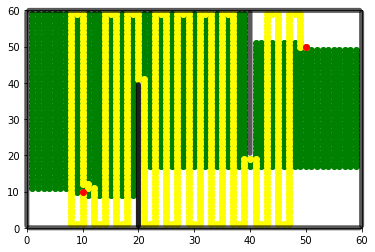

In [187]:
fig = plt.figure()
plt.xlim(0,60)
plt.ylim(0,60)
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(0, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(60, 0), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(60,0), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(0,60), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,0), xycoords='data',
              xytext=(20, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(40,20), xycoords='data',
              xytext=(40, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,0), xycoords='data',
              xytext=(20, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )


plt.scatter(x_reach,y_reach,color='g')
plt.scatter(x,y,color='yellow')
plt.scatter(10,10,color='r')
plt.scatter(50,50,color='r')
plt.show()

## Busca nao supervisionada: BFS - Printa todos os nos visitados

### Calculo do custo da busca e o caminho percorrido

In [188]:
init_pos = (10,10)
goal_pos = (50,50)

robot_problem = RobotProblem(init_pos, goal_pos, mapa, grafo)
# node, l = breadth_first_graph_search_mod(robot_problem)
node = best_first_search(robot_problem,len)
# node = breadth_first_graph_search(robot_problem)

In [189]:
x_reach = []
y_reach = []
for nod in list(reached):
    x_reach.append(nod[0])
    y_reach.append(nod[1])

In [166]:
list_nodes = []
try:
    for n in node.path():
        list_nodes.append(n.state)
except:
    pass

In [167]:
x = []
y = []
for nod in list_nodes:
    x.append(nod[0])
    y.append(nod[1])

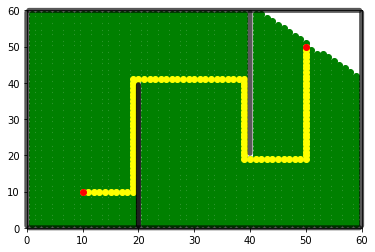

In [195]:
fig = plt.figure()
plt.xlim(0,60)
plt.ylim(0,60)
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(0, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(0,0), xycoords='data',
              xytext=(60, 0), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(60,0), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )

plt.annotate("",
              xy=(0,60), xycoords='data',
              xytext=(60, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,0), xycoords='data',
              xytext=(20, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(40,20), xycoords='data',
              xytext=(40, 60), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )
plt.annotate("",
              xy=(20,0), xycoords='data',
              xytext=(20, 40), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              edgecolor = "black",
                              linewidth=5,
                              alpha=0.65,
                              connectionstyle="arc3,rad=0."),
              )


plt.scatter(x_reach,y_reach,color='g')
plt.scatter(x,y,color='yellow')
plt.scatter(10,10,color='r')
plt.scatter(50,50,color='r')
plt.show()